<a href="https://colab.research.google.com/github/lmlouis/IntroductionIA/blob/main/CustomerSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Theme** : Gestion de Projet de Machine Learning 
## **Sujet** : Customer Segmentation ( Segmentation de la clientèle )


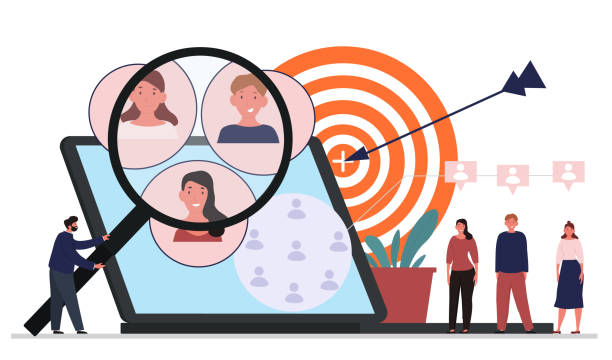


# Introduction

### Qu'est-ce que **Customer Segmentation** ?

[**shopify**![](https://cdn3.iconfinder.com/data/icons/social-media-2068/64/_shopping-512.png)](https://www.shopify.com/encyclopedia/customer-segmentation)

**Customer segmentation** est le processus qui consiste à diviser les clients en groupes sur la base de caractéristiques communes afin que les entreprises puissent commercialiser leurs produits auprès de chaque groupe de manière efficace et appropriée. 

## Pourquoi Faire de la **segmentation**?

> 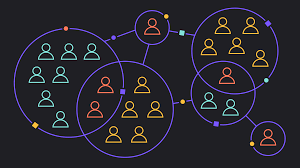





* Elaborer de **stratégies marketing ciblés** pour des groupes de clientèles cibles.
* Sélectionner le meilleur **canal de communication** pour chaque segment (mail, réseau sociaux, publicité) 
* Identifier les moyens d'**améliorer les produits ou les opportunités** de nouveaux produits ou services.
* Établir de **meilleures relations clients**.
* **Tester les options de prix**.
* **Identifier les clients les plus rentables**.
* Améliorer le **service à la clientèle**.
* **Vendre** d'autres produits et services.

## Pour qui faire de la **segmentation** ?

* partie prenantes de la chaine de décision

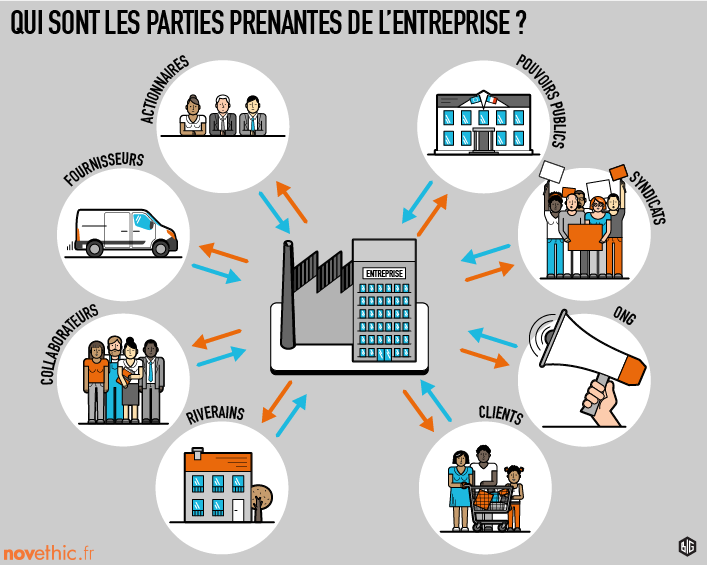



## Type de Segmentations 

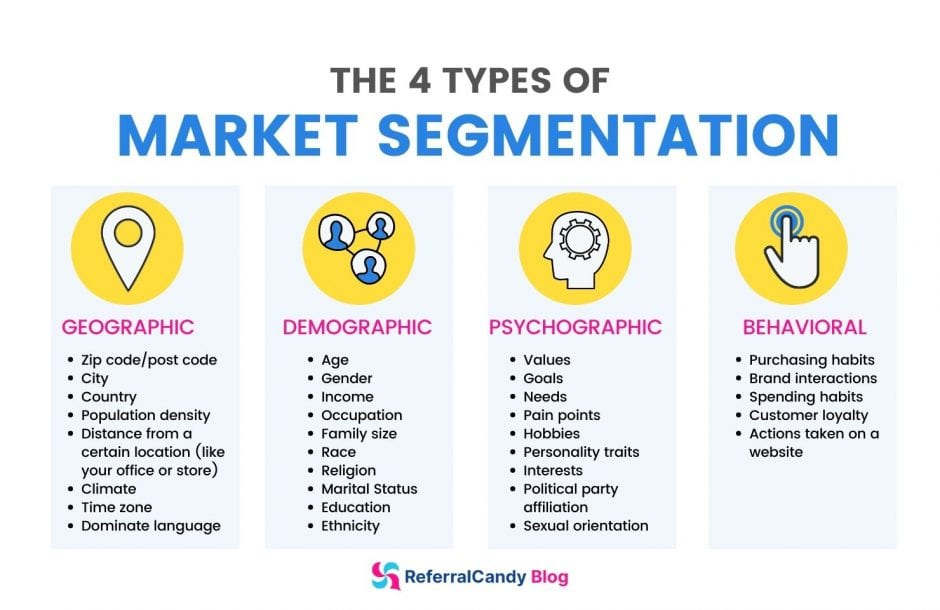

Il peut exister quatre types de segmentation pour mieux comprendre vos clients
* La segmentation **socio-démographique**.
* La segmentation **psychographique**.
* La segmentation **géographique**.
* La segmentation **comportementale**.


## Quand / Comment appliquer une segmentation client ?

* **En amont** : Définir les critères d'études.
* **En aval**: Analyser le comportement des clients lors du parcours d’achat.

## Quelles sont les techniques de segmentation ?
* Le **ciblage.** 

Qui se traduit par le choix des individus auxquels seront destinés vos campagnes marketing. 
* Le **scoring.** 

Principalement utilisé en B2B, cette méthode consiste à attribuer une note à vos prospects en fonction de leur potentiel d’affaire, et de leur avancement dans votre funnel commercial.

## Avantage Segmentation Client 

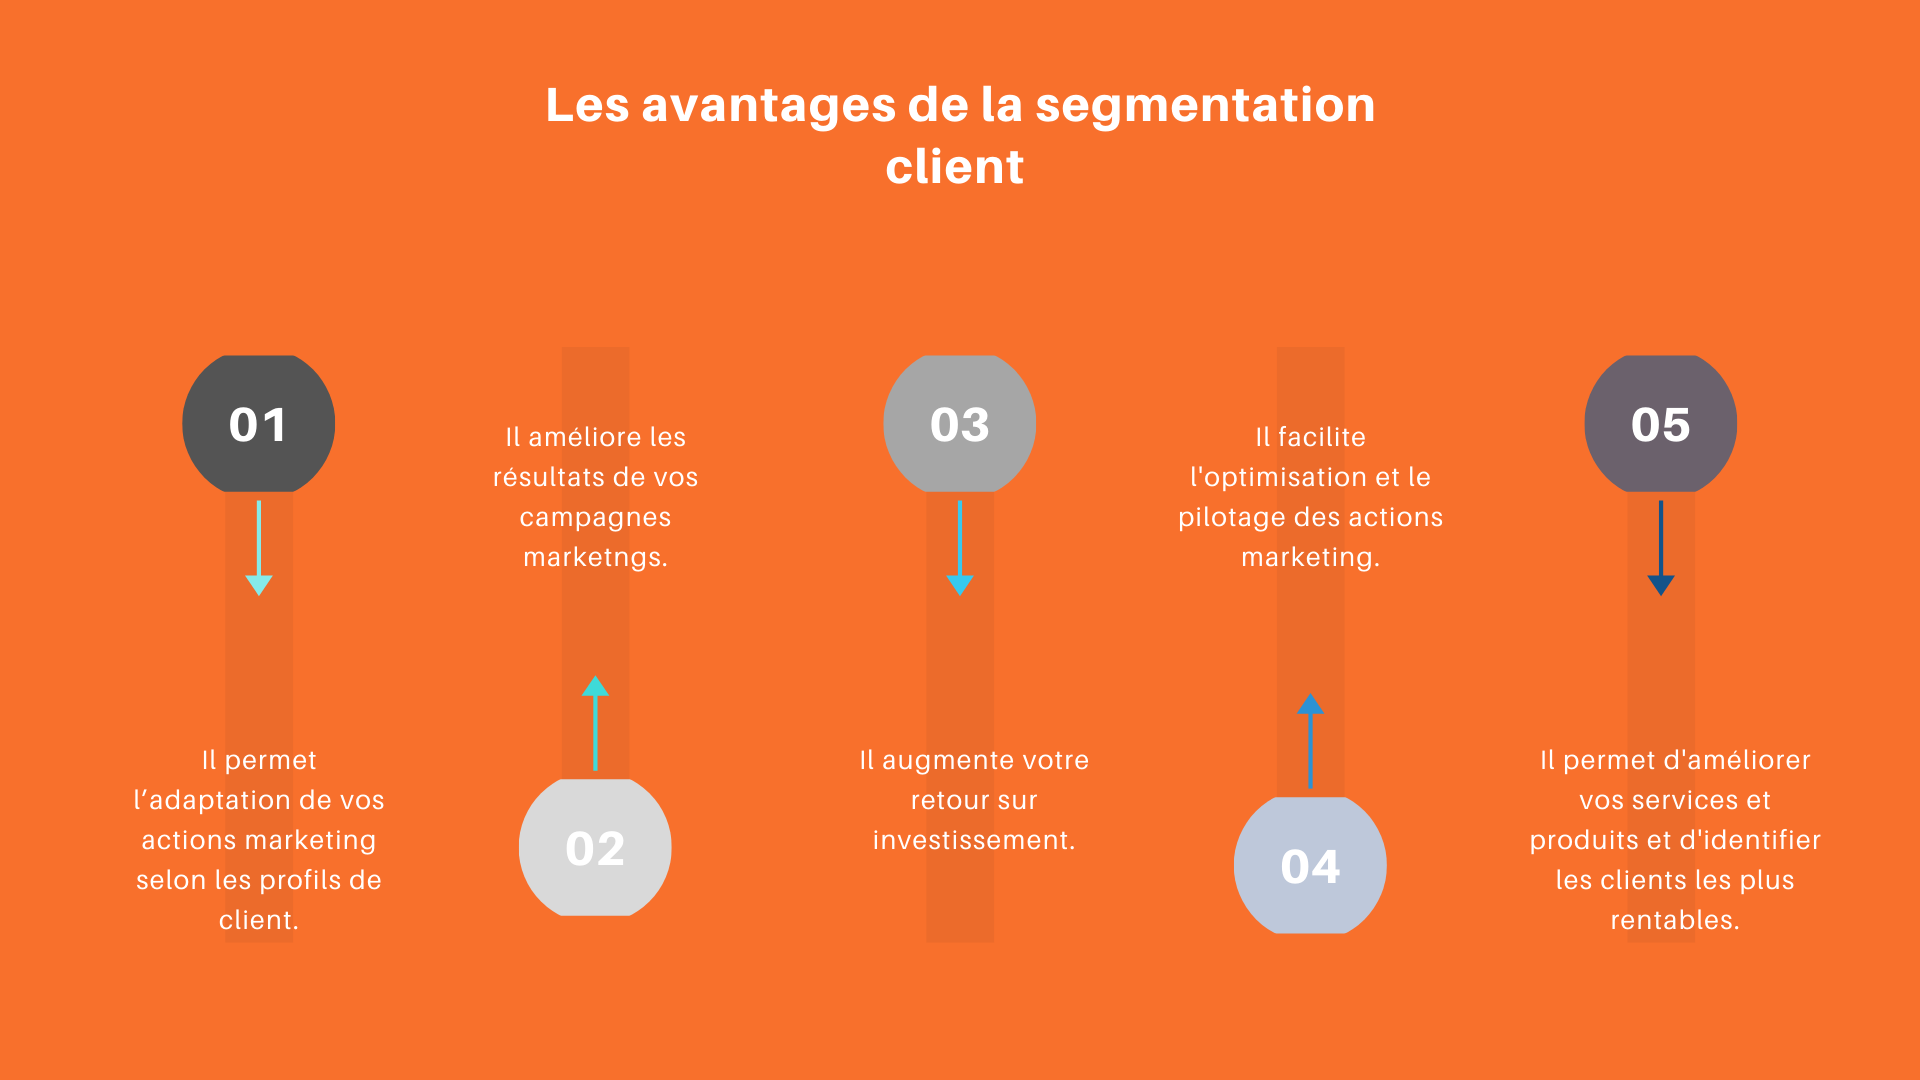

# Interêt d'utiliser le Machine Learning dans les Stratégies Marketing 




## Une Segmentation **Plus Fine**

**Machine Learning**, et plus précisément ceux appartenant à la famille des algorithmes de **Clustering**, répondent à cette problématique de **segmentation**. En effet, ils ont pour objectif d’identifier des groupes d’objets similaires et peuvent donc être utilisés pour segmenter sa base de clients. Ces programmes sont capables de prendre en compte beaucoup plus de **variables** qu’un simple humain et permettent donc de trouver de **nouvelles corrélations** entre ces dernières et donc de nouveaux segments de clients.


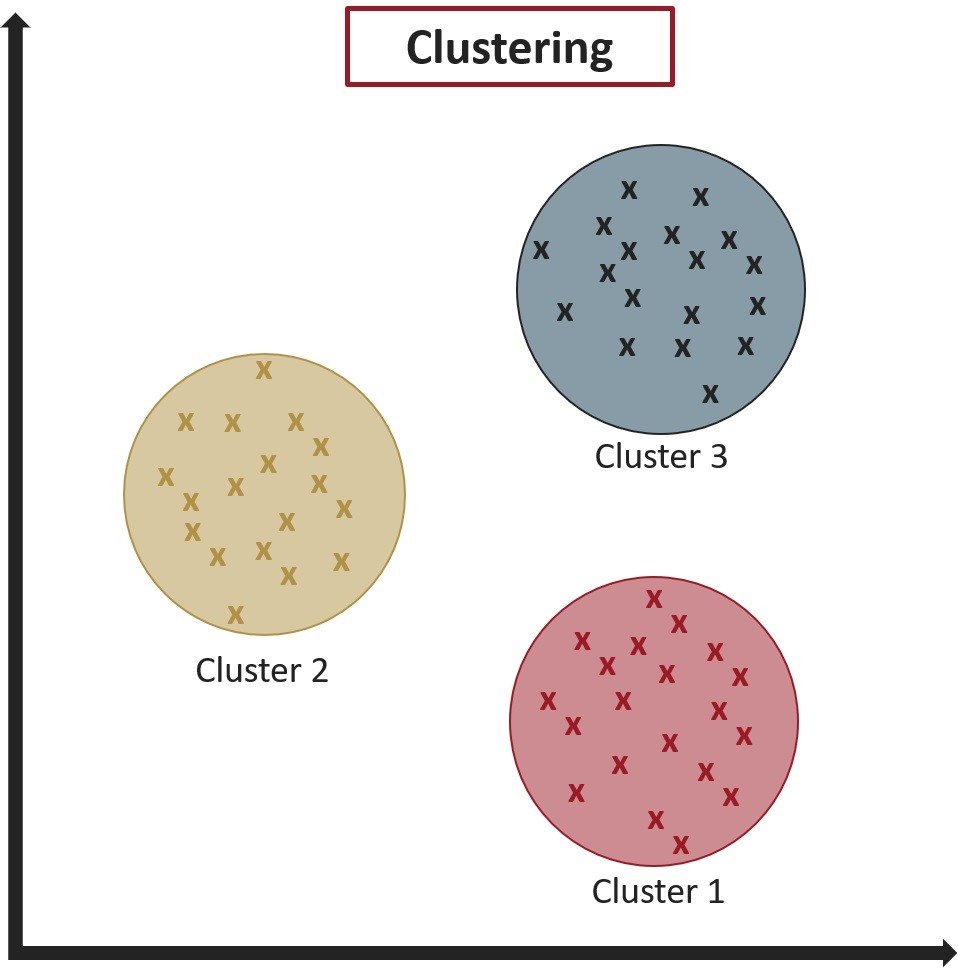

## Une meilleure **Prédiction** de **l’évolution** des **besoins** des **consommateurs**

Une fois que l’on a segmenté sa base de clients et que l’on a sélectionné ceux que l’on veut atteindre, on étudie leurs besoins spécifiques pour y répondre. Cependant, ces **besoins** peuvent **évoluer** dans le temps, en fonction de plusieurs facteurs, complexifiant ainsi l’analyse de ces derniers.

Les solutions de Machine Learning reposant sur des algorithmes de **Classification** et de **Régression** permettent de répondre à cette difficulté. Ces programmes, en analysant les données concernant les comportements des consommateurs achetant un produit, sont capables de repérer les **facteurs** communs qui ont poussés ces derniers à l’**acheter**. Une fois cette phase d’analyse terminée, l’algorithme peut être utilisé pour réaliser des prédictions sur de nouvelles données et donc prédire l’évolution des besoins des consommateurs. On parle de solutions de **Marketing Prédictif**.

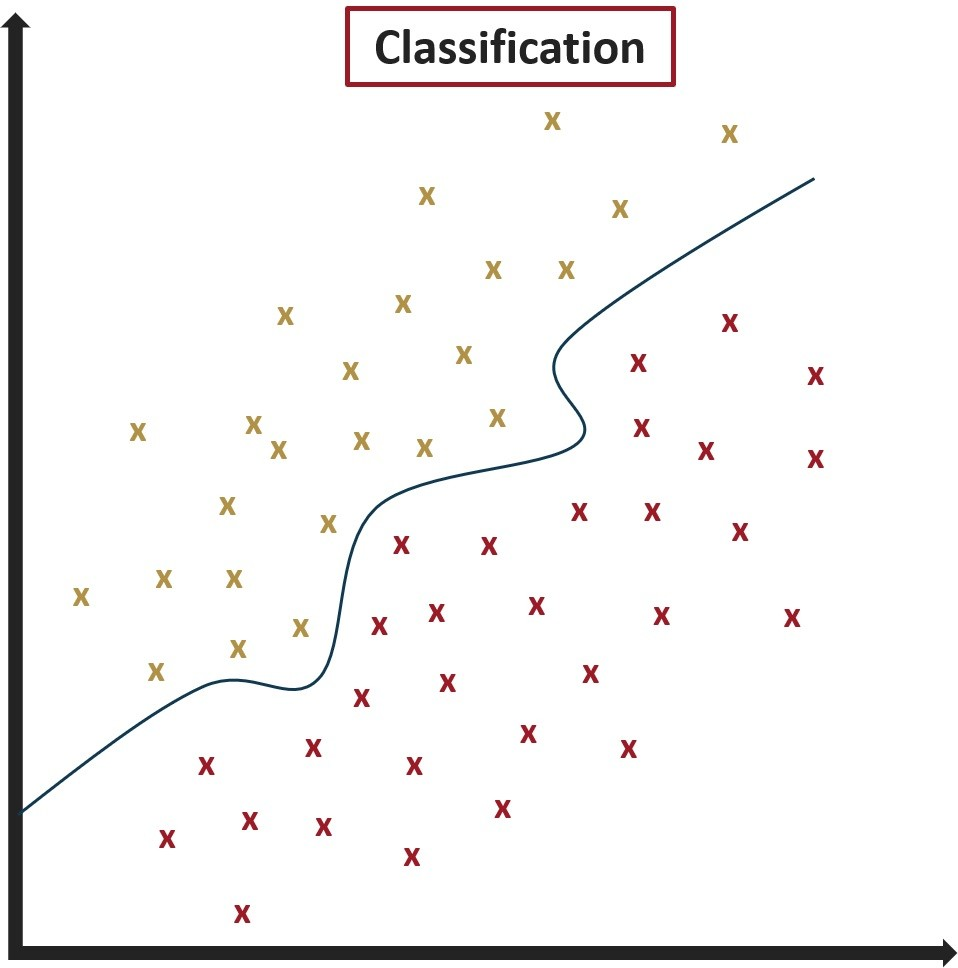





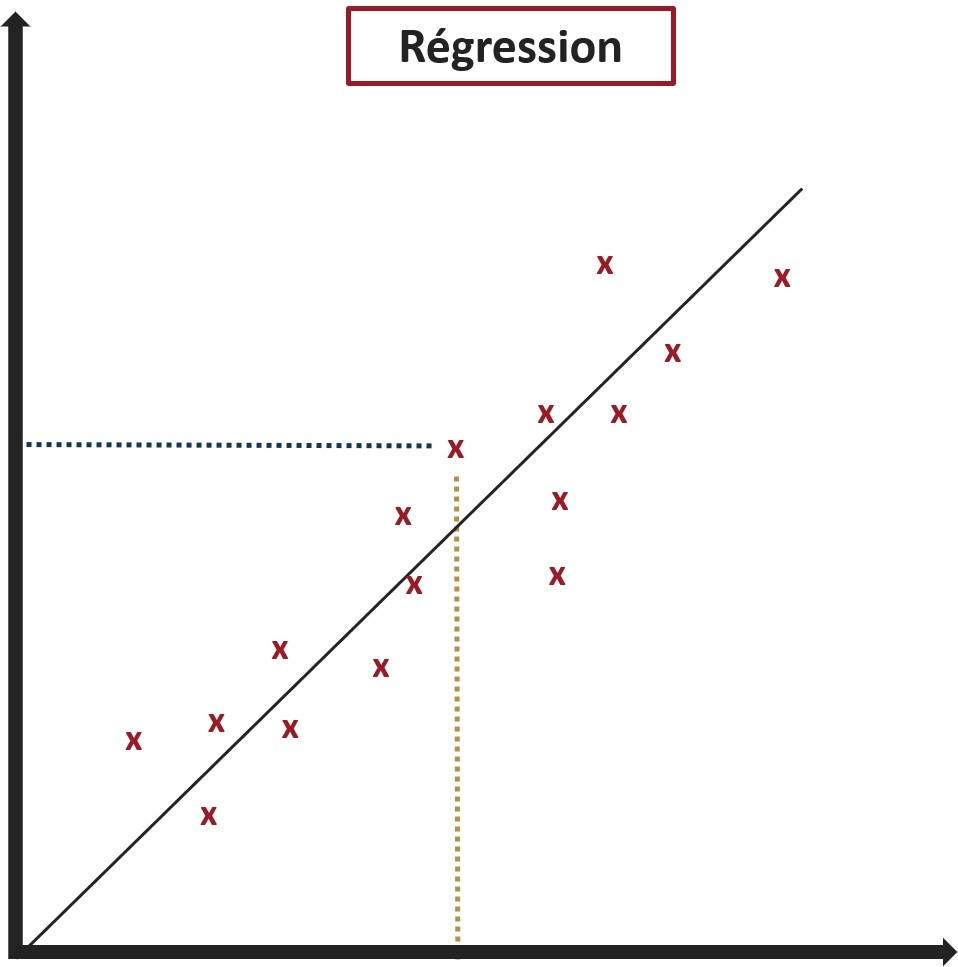


# 1. Identification du Problème 

## Définition du problème 

On voudrais élaborer une stratégie marketing sur des groupes spécifiques de clients afin d'augmenter le retour sur investissement.

**objectif**:

1 - Effectuer une segmentation de la clientèles afin reperer les cliens les plus remptables.

2 - Créer des modèles de machines learnings afin de prédire l'évolution des bésoin de notre cible dans le temps.

❓ ▶ **Quel est le résulat souhaité ?**

On souhaite deployer une nouvelle stratégie marketing sur nos clients les plus remptables.


❓ ▶ **Quel problème doit-on resoudre ?**

On doit effectuer une segmentation notre clientèle.

In [ ]:
#@title Les librairies à importer 
#@markdown * **numpy** : calcule scientifique  
import numpy as np
#@markdown * **pandas** : Manipulation des Dataframes
import pandas as pd 
#@markdown * **seaborn** : Visualisation des données 
import seaborn as sns
#@markdown * **matplotlib** : Visualisation des données
import matplotlib.pylab as plt

%matplotlib inline

#@markdown * **ipywidgets** : Jupyter Widgets pour les interactions entre Python et le navigateur.
import ipywidgets as widgets

#@markdown * **display** : methode IPython pour afficher des images
from IPython import display

import warnings
warnings.filterwarnings('ignore')


In [ ]:
from google.colab import drive #@title Importer google colab 
drive.mount('/gdrive') #@title importer google drive 

Mounted at /gdrive


In [ ]:
#@title Path du fichier .xlsx
path = "/gdrive/MyDrive/Gomycode /Introduction a IA /#6 - Comment etablir un projet de machine learning /Projet/src/Online Retail.xlsx"

In [ ]:
#@title Le jeu de données
dataset = pd.read_excel(path)
dataset.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# 2. Data Source 

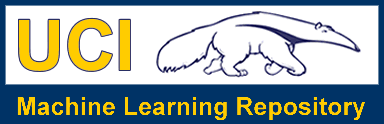

Le **dataset** est un fichier excel qui provient de l'[UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/online+retail):

## Context : **Online Retail Data Set**
Ensemble de données sur le commerce de détail en ligne

IL s'agit d'un ensemble de **données transnationales** qui contient **541 909** transactions effectuées entre le **01/12/2010** et le **09/12/2011** pour une entreprise de vente en ligne sans magasin, basée au Royaume-Uni et enregistrée, qui **vend** principalement des **cadeaux** uniques pour toutes les occasions. De nombreux **clients** de l'entreprise sont des **grossistes**.



## Information sur les attributs
8 attributs : 

* **InvoiceNo**: Numéro de facture. 

chaine, un numéro intégral à 6 chiffres attribué de manière unique à chaque transaction. Si ce code commence par la lettre 'c', cela indique une annulation.
* **StockCode**: Code du produit (article). 

chaine, un numéro intégral à 5 chiffres attribué de manière unique à chaque produit distinct.
* **Description**: Nom du produit (article). 

Nominal.
* **Quantity**: Les quantités de chaque produit (article) par transaction. 

Numérique.
* **InvoiceDate**: Date et heure de la facture. 

Numérique, le jour et l'heure où chaque transaction a été générée.
* **UnitPrice**: Prix unitaire. 

Numérique, Prix du produit par unité en livres sterling.
* **CustomerID**: Numéro de client.

chaine, un numéro intégral à 5 chiffres attribué de manière unique à chaque client.
* **Country**: Nom du pays. 

chaine, le nom du pays où réside chaque client.



# 3. Data Preparation

## Data preprocesinng 

In [ ]:
#@title Taille du dataset
def Taille_datset(data):
  return data.shape[0],data.shape[1]

T,C = Taille_datset(dataset)

afficher = "Nombre Ligne" 
print(T," Transactions")
print(C," critères") 




541909  Transactions
8  critères


In [ ]:
#@title Dtypes des colones 

def dtype(data, colone):
  return data[colone].dtypes

#@markdown ### Selectionner la colone :
for Colone in ["InvoiceNo","StockCode","Description","Quantity","InvoiceDate","UnitPrice","CustomerID","Country"] :
    print("\n")
    print(f"{Colone}, dtype = {dtype(dataset, Colone)}")



InvoiceNo, dtype = object


StockCode, dtype = object


Description, dtype = object


Quantity, dtype = int64


InvoiceDate, dtype = datetime64[ns]


UnitPrice, dtype = float64


CustomerID, dtype = float64


Country, dtype = object


In [ ]:
#@title Où se trouvent les valeurs manquantes ?

from IPython.display import display
#@markdown Cliker sur le bouton **Valeur NaN** pour afficher les colones qui contients des valeurs NAN
Value_NaN_btn = widgets.Button(description="Valeur NaN")
output = widgets.Output()

def on_button_clicked(b):
  # Display the message within the output widget.
  with output:
    print(list(dataset.columns[dataset.isnull().any()]))

Value_NaN_btn.on_click(on_button_clicked)
display(Value_NaN_btn, output)

Button(description='Valeur NaN', style=ButtonStyle())

Output()

In [ ]:
#@title Combien y a-t-il de Valeurs NAN ?

def missing_value(data, colone):
  return data[colone].isnull().sum(axis=0)

for Colone in ["InvoiceNo","StockCode","Description","Quantity","InvoiceDate","UnitPrice","CustomerID","Country"] :
    nbr_nan = missing_value(dataset, Colone)
    percentage = round(nbr_nan/dataset.shape[0]*100, 2)
    print("\n")
    print(f"{Colone}, Missing Value = {nbr_nan} NAN(s) soit {percentage}% du ")



InvoiceNo, Missing Value = 0 NAN(s) soit 0.0% du 


StockCode, Missing Value = 0 NAN(s) soit 0.0% du 


Description, Missing Value = 1454 NAN(s) soit 0.27% du 


Quantity, Missing Value = 0 NAN(s) soit 0.0% du 


InvoiceDate, Missing Value = 0 NAN(s) soit 0.0% du 


UnitPrice, Missing Value = 0 NAN(s) soit 0.0% du 


CustomerID, Missing Value = 135080 NAN(s) soit 24.93% du 


Country, Missing Value = 0 NAN(s) soit 0.0% du 


In [ ]:
#@title Supprimer la colone CustomerID du dataframe 

def drope_colone(data, colone):
  return data.drop(columns=colone)
#@markdown  Supprimer la colone **CustomerID** :
colone = "CustomerID" 
dataset = drope_colone(dataset, colone)
print(f"{colone} supprimée\n\n\ncolone restantes {list(dataset.columns)}")

CustomerID supprimée


colone restantes ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'Country']


In [ ]:
#@title Supprimer les valeurs manquantes sur **Description** 

def drope_ligne(data, colone):
  return data.dropna(subset=[colone])

#@markdown  Supprimer la colone **Description** :
colone = "Description" 
dataset = drope_ligne(dataset, colone)
nbr_nan = missing_value(dataset, Colone)
percentage = round(nbr_nan/dataset.shape[0]*100, 2)
print(f"{Colone}, Missing Value = {nbr_nan} NAN(s) soit {percentage}%")


Country, Missing Value = 0 NAN(s) soit 0.0%


In [ ]:
data = dataset

In [ ]:
#@title Renomer les Colones 
def rename(data, dict_colone):
  return data.rename(columns=dict_colone)


dict_colone = {"InvoiceNo": 'Numero Facture',
               "StockCode": 'Code',
               "Description": 'Produit',
               "Quantity": 'Quantité',
               "InvoiceDate": 'Date',
               "UnitPrice": 'Prix',
               "Country": 'Pays'} 


data = rename(data, dict_colone)
print(list(data.columns))




['Numero Facture', 'Code', 'Produit', 'Quantité', 'Date', 'Prix', 'Pays']


### Features Engeering

In [ ]:
#@title Supprimer le N° Facture et Code Produit

colone = "Code" 
data = drope_colone(data, colone)
print(f"{colone} supprimée\n\n\ncolone restantes {list(data.columns)}")
colone = 'Numero Facture' 
print("\n")
data = drope_colone(data, colone)
print(f"{colone} supprimée\n\n\ncolone restantes {list(data.columns)}")

Code supprimée


colone restantes ['Numero Facture', 'Produit', 'Quantité', 'Date', 'Prix', 'Pays']


Numero Facture supprimée


colone restantes ['Produit', 'Quantité', 'Date', 'Prix', 'Pays']


In [ ]:
#@title mettre les date de facturation comme index du dataframe 

data = data.set_index('Date')

data.head()

,Produit,Quantité,Prix,Pays
Date,,,,
2010-12-01 08:26:00,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,United Kingdom
2010-12-01 08:26:00,WHITE METAL LANTERN,6,3.39,United Kingdom
2010-12-01 08:26:00,CREAM CUPID HEARTS COAT HANGER,8,2.75,United Kingdom
2010-12-01 08:26:00,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,United Kingdom
2010-12-01 08:26:00,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,United Kingdom


In [ ]:
#@title Créer un critère Mois 
data['Mois'] = data.index.month_name()

In [ ]:
#@title visualiser colone mois

data["Mois"].head()

Date
2010-12-01 08:26:00    December
2010-12-01 08:26:00    December
2010-12-01 08:26:00    December
2010-12-01 08:26:00    December
2010-12-01 08:26:00    December
Name: Mois, dtype: object

In [ ]:
#@title Supprimer l'index data 
data  = data.reset_index().drop(columns="Date")

data

,Produit,Quantité,Prix,Pays,Mois
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,United Kingdom,December
1,WHITE METAL LANTERN,6,3.39,United Kingdom,December
2,CREAM CUPID HEARTS COAT HANGER,8,2.75,United Kingdom,December
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,United Kingdom,December
4,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,United Kingdom,December
...,...,...,...,...,...
540450,PACK OF 20 SPACEBOY NAPKINS,12,0.85,France,December
540451,CHILDREN'S APRON DOLLY GIRL,6,2.10,France,December
540452,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,France,December
540453,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,France,December


In [ ]:
#@title Calculer le  Chiffre d'affaire  : CA = prix de vente x quantités vendues.

data["Chiffre Affaire (CA)"] = data['Prix']*data['Quantité']
data["Chiffre Affaire (CA)"].head()

0    15.30
1    20.34
2    22.00
3    20.34
4    20.34
Name: Chiffre Affaire (CA), dtype: float64

In [ ]:
List_Pays = list(data.Pays.value_counts().index)
List_Pays

['United Kingdom',
 'Germany',
 'France',
 'EIRE',
 'Spain',
 'Netherlands',
 'Belgium',
 'Switzerland',
 'Portugal',
 'Australia',
 'Norway',
 'Italy',
 'Channel Islands',
 'Finland',
 'Cyprus',
 'Sweden',
 'Unspecified',
 'Austria',
 'Denmark',
 'Japan',
 'Poland',
 'Israel',
 'USA',
 'Hong Kong',
 'Singapore',
 'Iceland',
 'Canada',
 'Greece',
 'Malta',
 'United Arab Emirates',
 'European Community',
 'RSA',
 'Lebanon',
 'Lithuania',
 'Brazil',
 'Czech Republic',
 'Bahrain',
 'Saudi Arabia']

In [ ]:
data.head()

,Produit,Quantité,Prix,Pays,Mois,Chiffre Affaire (CA)
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,United Kingdom,December,15.30
1,WHITE METAL LANTERN,6,3.39,United Kingdom,December,20.34
2,CREAM CUPID HEARTS COAT HANGER,8,2.75,United Kingdom,December,22.00
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,United Kingdom,December,20.34
4,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,United Kingdom,December,20.34


In [ ]:
#@title Importer Nominatim de geopy.geocoders
from geopy.geocoders import Nominatim

# Initialize Nominatim API
geolocator = Nominatim(user_agent="MyApp")



In [ ]:

location_pays = {p:[geolocator.geocode(p).latitude,geolocator.geocode(p).longitude] for p in List_Pays}
location_pays

{'United Kingdom': [54.7023545, -3.2765753],
 'Germany': [51.1638175, 10.4478313],
 'France': [46.603354, 1.8883335],
 'EIRE': [52.865196, -7.9794599],
 'Spain': [39.3260685, -4.8379791],
 'Netherlands': [52.2434979, 5.6343227],
 'Belgium': [50.6402809, 4.6667145],
 'Switzerland': [46.7985624, 8.2319736],
 'Portugal': [39.6621648, -8.1353519],
 'Australia': [-24.7761086, 134.755],
 'Norway': [61.1529386, 8.7876653],
 'Italy': [42.6384261, 12.674297],
 'Channel Islands': [33.96579515, -120.09189711105296],
 'Finland': [63.2467777, 25.9209164],
 'Cyprus': [34.9823018, 33.1451285],
 'Sweden': [59.6749712, 14.5208584],
 'Unspecified': [26.8262855, 65.7212456],
 'Austria': [47.59397, 14.12456],
 'Denmark': [55.670249, 10.3333283],
 'Japan': [36.5748441, 139.2394179],
 'Poland': [52.215933, 19.134422],
 'Israel': [30.8124247, 34.8594762],
 'USA': [39.7837304, -100.445882],
 'Hong Kong': [22.2793278, 114.1628131],
 'Singapore': [1.357107, 103.8194992],
 'Iceland': [64.9841821, -18.1059013],
 

In [ ]:
#@title definir la fonction pour ajouter les coordonnées des pays 
def add_longitudeAndlatitude(data,location_pays,List_Pays):
  data['Latitude']=pd.Series()
  data['Longitude']=pd.Series()
  for i in range(data.shape[0]):
    for pays in List_Pays:
      if(data.Pays.iloc[i] == pays):
        data['Latitude'].iloc[i] = location_pays[pays][0]
        data['Longitude'].iloc[i] = location_pays[pays][1]
  return data['Latitude'],data['Longitude']


In [ ]:
  #@title implementation des coordonnées
  data['Latitude'],data['Longitude']=add_longitudeAndlatitude(data,location_pays,List_Pays)
  data.head()

,Produit,Quantité,Prix,Pays,Mois,Chiffre Affaire (CA),Latitude,Longitude
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,United Kingdom,December,15.30,54.702354,-3.276575
1,WHITE METAL LANTERN,6,3.39,United Kingdom,December,20.34,54.702354,-3.276575
2,CREAM CUPID HEARTS COAT HANGER,8,2.75,United Kingdom,December,22.00,54.702354,-3.276575
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,United Kingdom,December,20.34,54.702354,-3.276575
4,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,United Kingdom,December,20.34,54.702354,-3.276575


In [ ]:
data = pd.read_csv("/gdrive/MyDrive/Gomycode /Introduction a IA /#6 - Comment etablir un projet de machine learning /Projet/src/data.csv")

In [ ]:
data = data.drop(columns="Unnamed: 0")

In [ ]:
#@title remplacer Mois par 
data['Numero Mois'] = data['Mois'].replace({"November":11,
"December":12,
"October":10,
"September":9,
"July":6,
"May":5,
"June":6,
"March":3,
"August":8,
"January":1,
"April":4,
"February":2})
data.head()

,Produit,Quantité,Prix,Pays,Mois,Chiffre Affaire (CA),Latitude,Longitude,Numero Mois
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,United Kingdom,December,15.30,54.702354,-3.276575,12
1,WHITE METAL LANTERN,6,3.39,United Kingdom,December,20.34,54.702354,-3.276575,12
2,CREAM CUPID HEARTS COAT HANGER,8,2.75,United Kingdom,December,22.00,54.702354,-3.276575,12
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,United Kingdom,December,20.34,54.702354,-3.276575,12
4,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,United Kingdom,December,20.34,54.702354,-3.276575,12


In [ ]:
#@title dataframe qui regoupe les coordonnées 
def data_coordonate(data):
  data_per_coord = data.groupby(["Pays","Latitude","Longitude"]).mean()
  df = pd.DataFrame()
  df = data_per_coord.reset_index()
  df["Pays"] = [list(data_per_coord.index)[i][0] for i in range(len(data_per_coord))]
  df["Latitude"] = [list(data_per_coord.index)[i][1] for i in range(len(data_per_coord))]
  df["Longitude"] = [list(data_per_coord.index)[i][2] for i in range(len(data_per_coord))]
  
  return df

In [ ]:
data_per_coord = data_coordonate(data)
data_per_coord = data_per_coord.sort_values(by="Chiffre Affaire (CA)", ascending=False)
data_per_coord

,Pays,Latitude,Longitude,Quantité,Prix,Chiffre Affaire (CA),Numero Mois
24,Netherlands,52.243498,5.634323,84.406580,2.738317,120.059696,6.735976
0,Australia,-24.776109,134.755000,66.444003,3.220612,108.877895,5.944400
20,Japan,36.574844,139.239418,70.441341,2.276145,98.716816,6.379888
32,Sweden,59.674971,14.520858,77.136364,3.910887,79.211926,7.164502
9,Denmark,55.670249,10.333328,21.048843,3.256941,48.247147,7.894602
22,Lithuania,55.350000,23.750000,18.628571,2.841143,47.458857,12.000000
30,Singapore,1.357107,103.819499,22.855895,109.645808,39.827031,4.864629
21,Lebanon,33.875063,35.843409,8.577778,5.387556,37.641778,1.000000
4,Brazil,-10.333333,-53.200000,11.125000,4.456250,35.737500,4.000000
16,Hong Kong,22.279328,114.162813,16.559028,42.505208,35.128611,5.326389


# 4. Data Visualisation

In [ ]:
#@title créer un a world map qui montre distributions du marché 
import folium
from folium.plugins import MarkerCluster
#empty map
world_map= folium.Map(tiles="cartodbpositron")
marker_cluster = MarkerCluster().add_to(world_map)
#for chaque coordonnée, on va créer un circlemarker de chiffre Chiffre Affaire (CA)
for i in range(len(data_per_coord)):
        latitude = data_per_coord.iloc[i]['Latitude']
        longitude = data_per_coord.iloc[i]['Longitude']
        radius=5
        popup_text = """Pays : {} , Quantité Total : {}, Prix Total : {}
                        Chiffre Affaire Total : {}"""
        popup_text = popup_text.format(data_per_coord.iloc[i]['Pays'],
                                       data_per_coord.iloc[i]['Quantité'],
                                       data_per_coord.iloc[i]['Prix'],
                                   data_per_coord.iloc[i]['Chiffre Affaire (CA)']
                                   )
        folium.CircleMarker(location = [latitude, longitude], radius=radius, popup= popup_text, fill =True).add_to(marker_cluster)
#show the map
world_map

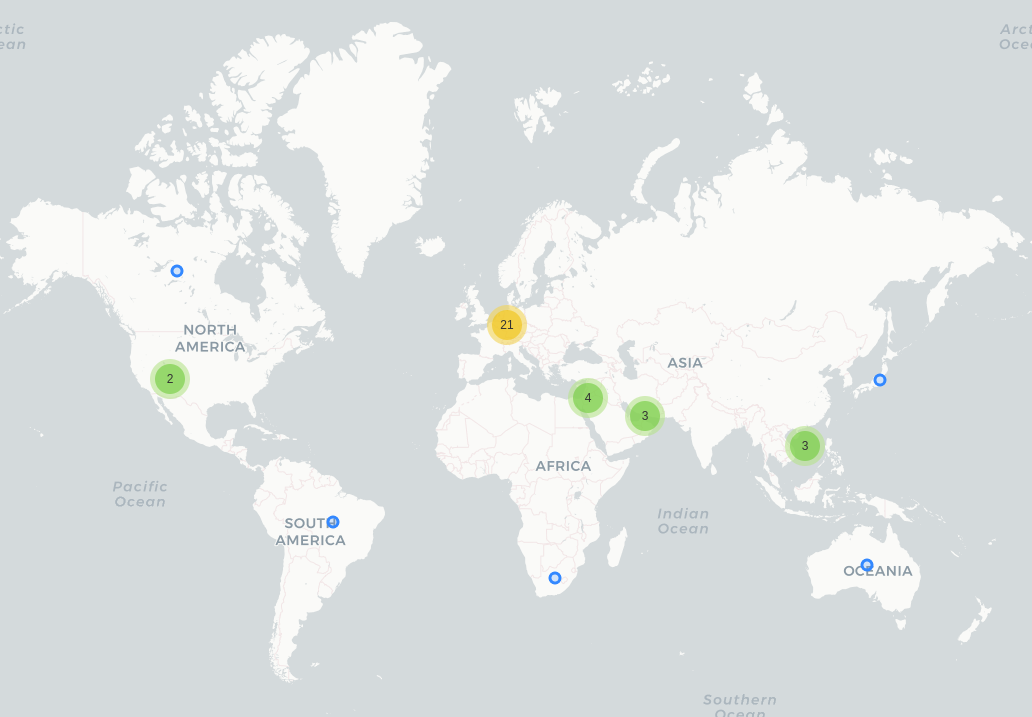

Les clients sont un peu partout dans le monde :
* Amérique 
* Europe 
* moyenne orient
* asie occidental
* asie du sud 

Ils forment 3 grand groupes distints:
* groupe 1 : **marché élévé** en europe
* groupe 2 : **marché moyen** , amérique nord, asis et moyen orient
* groupe 3 : **marché faible** , afrique, oceanie, amérique du sud, canada, etc

In [ ]:
(data[data.Produit.values == data.Produit.describe().get("top")]).shape

(2369, 9)

In [ ]:
(data[data.Produit.values == data.Produit.describe().get("top")])['Numero Mois'].value_counts()

6     328
12    304
11    273
5     233
3     197
9     187
1     185
4     184
10    173
8     156
2     149
Name: Numero Mois, dtype: int64

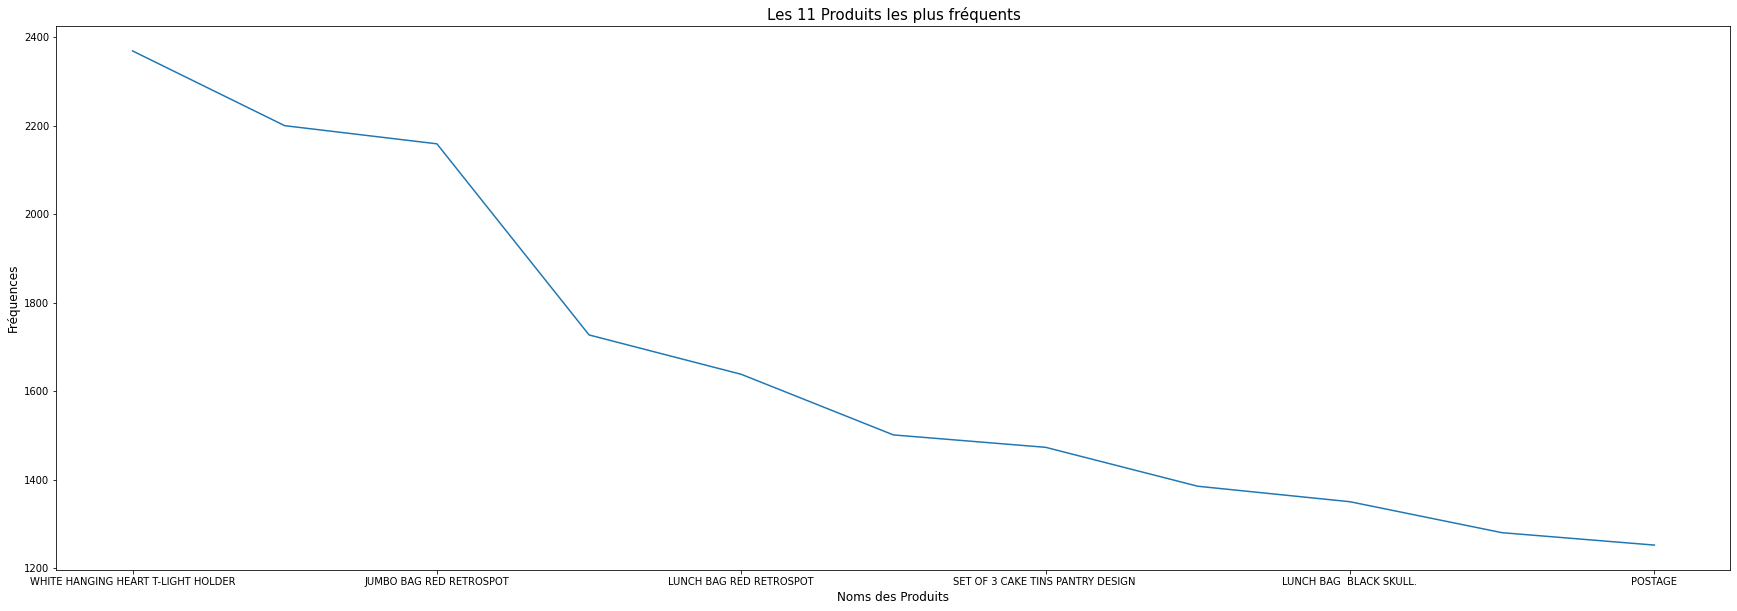

In [ ]:
#@title Meilleur Produit sur le marché 
topListProduit={k:v for k, v in zip(list(data.Produit.value_counts().index),list(data.Produit.value_counts()))}
def N_Best_produit(topListProduit, nbr):
  
  return pd.Series(topListProduit).head(nbr)

K_best_products = 11 
best_products = N_Best_produit(topListProduit, int(K_best_products))
def plot_k_best_prod(best_products,K_best_products):
  f, ax = plt.subplots(figsize =(30, 10))
  ax.set_ylabel('Fréquences', fontsize=12)
  ax.set_xlabel('Noms des Produits', fontsize=12)
  ax.set_title(f'Les {K_best_products} Produits les plus fréquents', fontsize=15)
  return best_products.plot()

plot_k_best_prod(best_products,K_best_products)

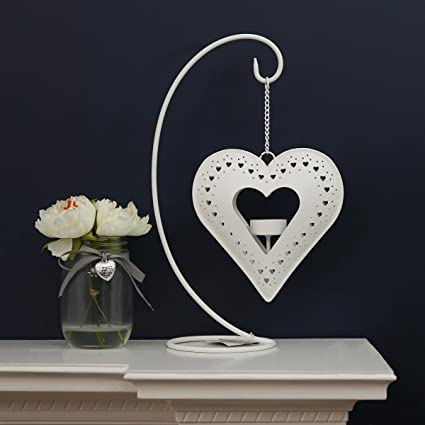

In [ ]:
#@title  Top des ventes : WHITE HANGING HEART T-LIGHT HOLDER
list(data[data.Produit.values == data.Produit.describe().get("top")].Produit)[0]

display.Image('https://m.media-amazon.com/images/I/615AibHrRDL._AC_SX425_.jpg')

In [ ]:
#@title Chiffre Affaire (CA)?
data[data.Produit.values == data.Produit.describe().get("top")]["Chiffre Affaire (CA)"].sum()

99668.47

In [ ]:
#@title Combien de transactions sont concernées ?
topProduit= data[data.Produit.values == data.Produit.describe().get("top")]
topProduit['Produit'].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER    2369
Name: Produit, dtype: int64

In [ ]:
#@title Ventes monsuelles
df_par_Mois =  data.groupby('Mois').sum()

attributs=widgets.Dropdown(
    
    options=["Quantité",	"Prix",	"Chiffre Affaire (CA)"],
    #value='2',
    description='Critères:',
    disabled=False,
)
def plot(hue_value):
  f, ax = plt.subplots(figsize =(15,10))
  ax.set_xlabel('Période', fontsize=12)
  ax.set_ylabel(hue_value, fontsize=12)
  ax.set_title(f" {hue_value} monsuels  ", fontsize=15)
  sns.lineplot(data=df_par_Mois,x="Mois", y=hue_value)
  

widgets.interact(plot, hue_value=attributs)

interactive(children=(Dropdown(description='Critères:', options=('Quantité', 'Prix', 'Chiffre Affaire (CA)'), …

<function __main__.plot(hue_value)>

* Decembre, Juillet et Novembre nous **écoulons** le plus de **stoks**
* Decembre et Novembre les **prix les plus fort**
* Decembre et Novembre nous génerons le plus de **profits**

In [ ]:
#@title Transactions par Pays 
df_par_Pays =  data.groupby('Pays').mean()
df_par_Pays.head()

,Quantité,Prix,Chiffre Affaire (CA),Latitude,Longitude,Numero Mois
Pays,,,,,,
Australia,66.444003,3.220612,108.877895,-24.776109,134.755000,5.944400
Austria,12.037406,4.243192,25.322494,47.593970,14.124560,7.488778
Bahrain,13.684211,4.556316,28.863158,26.155125,50.534461,5.157895
Belgium,11.189947,3.644335,19.773301,50.640281,4.666715,7.324795
Brazil,11.125000,4.456250,35.737500,-10.333333,-53.200000,4.000000


In [ ]:
#@title Dans quelle Pays a-t-on le plus vendu de produits ?

mesure = widgets.Dropdown(
    
    options=["Quantité",	"Prix",	"Chiffre Affaire (CA)","Numero Mois"],
    #value='2',
    description='Critères:',
    disabled=False,
)
df_par_Pays =  data.groupby('Pays').mean()


def plot(mesure):
  f, ax = plt.subplots(figsize =(15,10))
  ax.set_title(f" {mesure} ", fontsize=15)
  df_par_Pays[mesure].plot(kind='barh')
  

widgets.interact(plot,mesure=mesure)

interactive(children=(Dropdown(description='Critères:', options=('Quantité', 'Prix', 'Chiffre Affaire (CA)', '…

<function __main__.plot(mesure)>

Nos client plus gros consomateurs se situent :
* UK
* Netherlands
* Germany
* France
* EIRE
* Australia

In [ ]:
data=data[data['Chiffre Affaire (CA)'] < 40 ]
data=data[ 0 <  data['Chiffre Affaire (CA)'] ]
data=data[data['Prix'] < 20 ]
data=data[data['Quantité'] < 20 ]

In [ ]:
data.shape

(451740, 9)

In [ ]:
np.dtype(object)

dtype('O')

## Label Encoder 

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()



def Encodage(instance_colone):
  instance_colone = encoder.fit_transform(instance_colone)
  return instance_colone

# Aplication Code 
def code(data):
  for colone in [colone for colone in data.columns.to_list() if(data[colone].dtypes == np.dtype(object))]:
    data[colone] = Encodage(data[colone])
  return data

# dataset clean  
dataSauvegarde = data.copy() 
data = code(data)

data
     

,Produit,Quantité,Prix,Pays,Mois,Chiffre Affaire (CA),Latitude,Longitude,Numero Mois
0,3760,6,2.55,36,2,15.30,54.702354,-3.276575,12
1,3768,6,3.39,36,2,20.34,54.702354,-3.276575,12
2,862,8,2.75,36,2,22.00,54.702354,-3.276575,12
3,1815,6,3.39,36,2,20.34,54.702354,-3.276575,12
4,2784,6,3.39,36,2,20.34,54.702354,-3.276575,12
...,...,...,...,...,...,...,...,...,...
540450,2267,12,0.85,13,2,10.20,46.603354,1.888334,12
540451,694,6,2.10,13,2,12.60,46.603354,1.888334,12
540452,700,4,4.15,13,2,16.60,46.603354,1.888334,12
540453,699,4,4.15,13,2,16.60,46.603354,1.888334,12


## Correlation entre les variables

In [ ]:
#@title matrice de correlation entre les variables 
matrice_corelation = data.drop(columns=["Latitude", "Longitude","Numero Mois"]).corr()
matrice_corelation

,Produit,Quantité,Prix,Pays,Mois,Chiffre Affaire (CA)
Produit,1.000000,-0.001765,-0.004144,-0.009100,0.017052,0.012980
Quantité,-0.001765,1.000000,-0.358202,-0.200998,0.026174,0.523687
Prix,-0.004144,-0.358202,1.000000,-0.010663,-0.026498,0.376219
Pays,-0.009100,-0.200998,-0.010663,1.000000,-0.017263,-0.206823
Mois,0.017052,0.026174,-0.026498,-0.017263,1.000000,0.011778
Chiffre Affaire (CA),0.012980,0.523687,0.376219,-0.206823,0.011778,1.000000


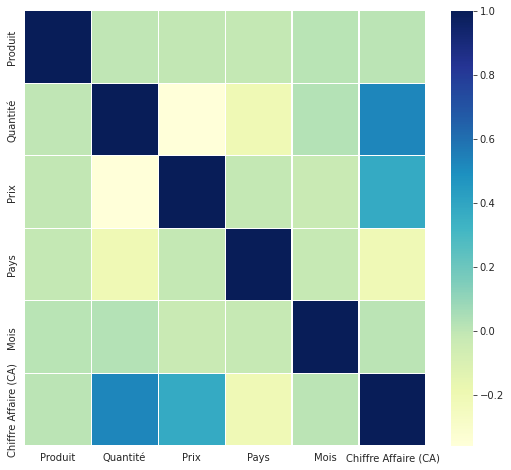

In [ ]:
#@title visualiser correlation
from seaborn.widgets import plt
f, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(matrice_corelation, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

* il existe une forte correlation entre la **quantité**, le **produit** et le **chiffre d'affaire**

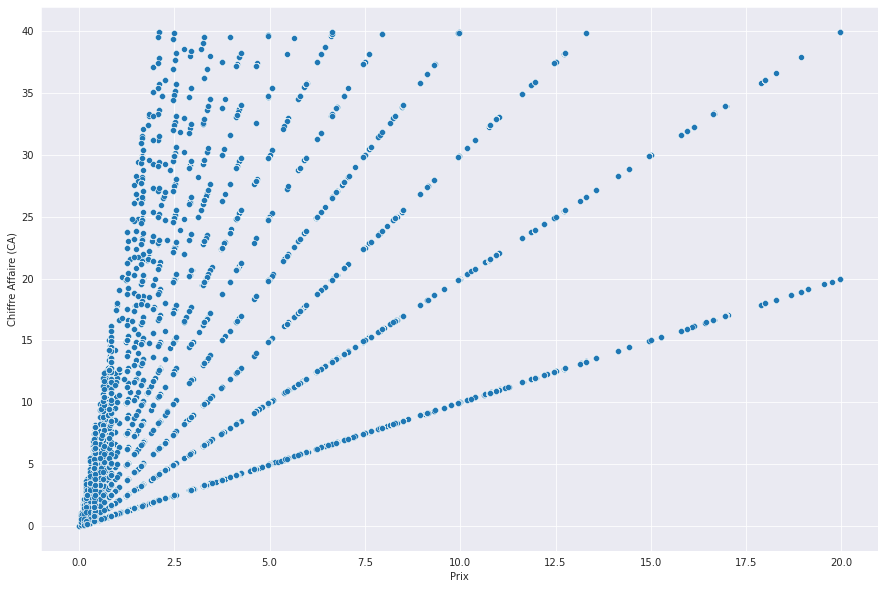

In [ ]:
f, ax = plt.subplots(figsize =(15,10))
sns.scatterplot(data=data, x="Prix", y="Chiffre Affaire (CA)")

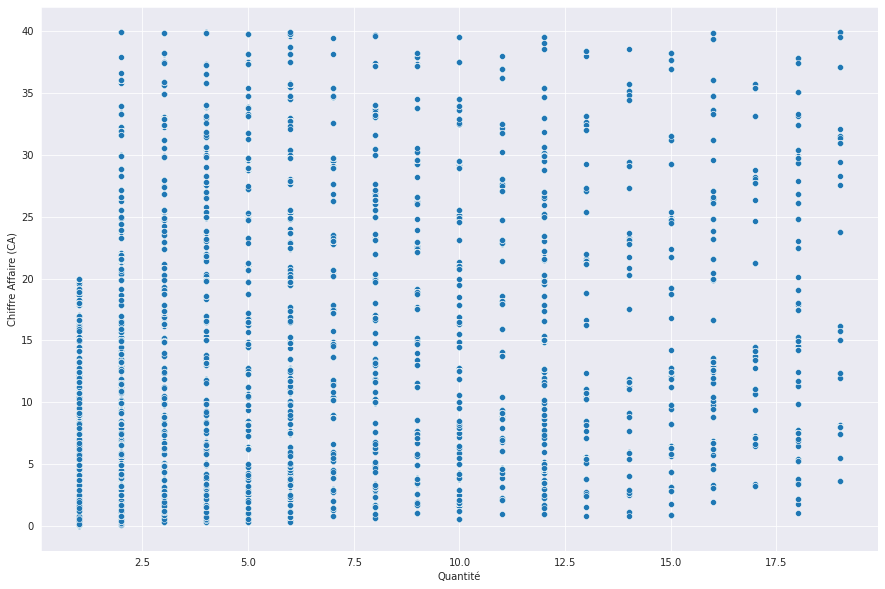

In [ ]:
f, ax = plt.subplots(figsize =(15,10))
sns.scatterplot(data=data, x="Quantité", y="Chiffre Affaire (CA)")

# Algorithmes de Machines Learning Pour la segmentation clients 

* clustering (segmentation) : **K-means**
* analyse predictive des besoins du client : 
   * classification : **Random Forest** 
   * regression : **regression linéaire**

* Test et Evaluation du modèle : **MSE**, **R square**, **Elbow Method**

In [ ]:
#@title Features Selections
dataframe = data.drop(columns=["Latitude","Longitude","Numero Mois"])
dataframe.head()

,Produit,Quantité,Prix,Pays,Mois,Chiffre Affaire (CA)
0,3760,6,2.55,36,2,15.30
1,3768,6,3.39,36,2,20.34
2,862,8,2.75,36,2,22.00
3,1815,6,3.39,36,2,20.34
4,2784,6,3.39,36,2,20.34


# clustering (segmentation) : **K-means**

On va effectuer un **ciblage** de nos clients suivants la sone géographique 

In [ ]:
features = ["Produit","Quantité","Prix","Pays","Mois","Chiffre Affaire (CA)"]

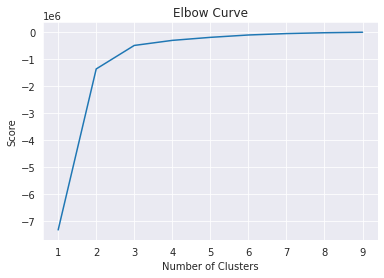

In [ ]:
from sklearn.cluster import KMeans



X = dataframe[features]

K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = dataframe[["Quantité"]]
X_axis = dataframe[["Chiffre Affaire (CA)"]]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

La courbe nous indique qu'au dela de 6 clusters le modèle perd de sa précision 

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 6, init ='k-means++')
kmeans.fit(X) # Compute k-means clustering.
X['cluster_label'] = kmeans.fit_predict(X)
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(X)# Labels of each point
X.head(10)

,Produit,Quantité,Prix,Pays,Mois,Chiffre Affaire (CA),cluster_label
0,3760,6,2.55,36,2,15.30,3
1,3768,6,3.39,36,2,20.34,3
2,862,8,2.75,36,2,22.00,2
3,1815,6,3.39,36,2,20.34,0
4,2784,6,3.39,36,2,20.34,1
5,3026,2,7.65,36,2,15.30,1
6,1443,6,4.25,36,2,25.50,0
7,1565,6,1.85,36,2,11.10,0
8,1562,6,1.85,36,2,11.10,0
10,2619,6,2.10,36,2,12.60,1


In [ ]:
X.cluster_label.value_counts()

1    98078
0    81375
3    74418
2    73122
5    70293
4    54454
Name: cluster_label, dtype: int64

## Kmeans Plot :  Segmentation des Produits en fonction du prix  

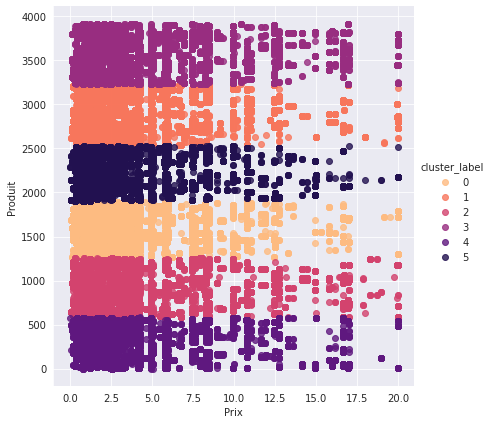

In [ ]:
sns.set_style('darkgrid')
sns.lmplot(y = "Produit", x="Prix",data=X, hue='cluster_label',palette='magma_r',size=6,aspect=1,fit_reg=False)

## Kmeans Plot :  Segmentation des Produits en fonction du pays

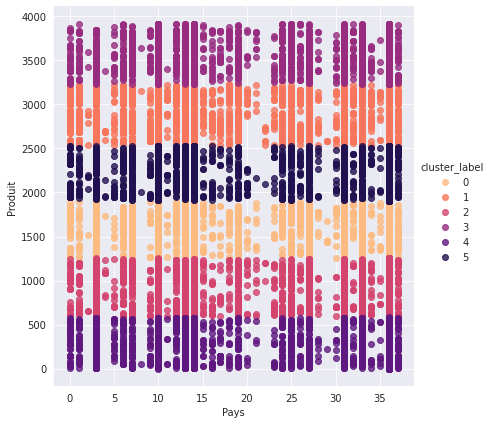

In [ ]:
sns.set_style('darkgrid')
sns.lmplot(x="Pays", y="Produit",data=X, hue='cluster_label',palette='magma_r',size=6,aspect=1,fit_reg=False)

## Kmeans Plot :  Segmentation du Produit en fonction des périodes monsuelles 

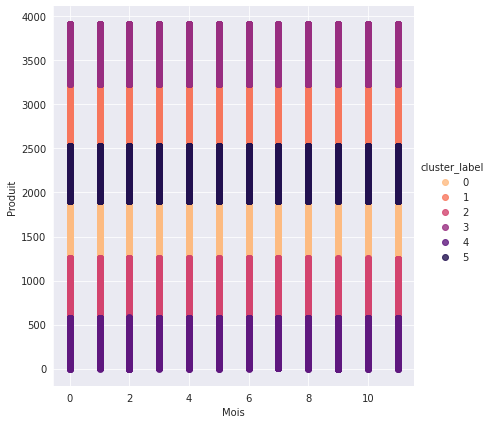

In [ ]:
sns.set_style('darkgrid')
sns.lmplot(x="Mois", y="Produit",data=X, hue='cluster_label',palette='magma_r',size=6,aspect=1,fit_reg=False)

## Kmeans Plot :  Segmentation des Produits en fonction du Chiffre Affaire 

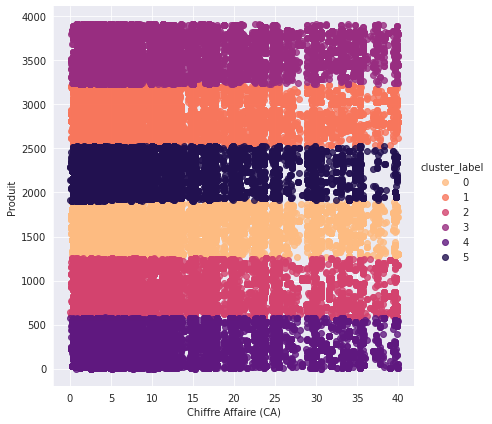

In [ ]:
sns.set_style('darkgrid')
sns.lmplot(y="Produit", x="Chiffre Affaire (CA)",data=X, hue='cluster_label',palette='magma_r',size=6,aspect=1,fit_reg=False)

# Deploiement & test Kmeans 

In [ ]:
def algorithm_kmeans(data):
  features = ["Produit","Quantité","Prix","Pays","Mois","Chiffre Affaire (CA)"]	
  nbre_clusters = 6
  X = data[features]
  """ Retourn prediction Kmeams  X : datafame latitude, longitude, label  centers : kmeans.cluster_centers_, labels :  kmeans.fit_predict(X) """
  
  from sklearn.cluster import KMeans
  import pickle

  kmeans = KMeans(n_clusters = nbre_clusters, init ='k-means++')
  kmeans.fit(X)
  X['label'] = kmeans.fit_predict(X)
  centers = kmeans.cluster_centers_ 
  labels = kmeans.predict(X[features])
  pickle.dump(kmeans, open('algorithm_kmeans.pkl','wb'))




In [ ]:
algorithm_kmeans(data)

In [ ]:
def convertirPays(pays):
  
  from geopy.geocoders import Nominatim

  geolocator = Nominatim(user_agent="MyApp")
  return [geolocator.geocode(pays).latitude,geolocator.geocode(pays).longitude]


In [ ]:
colone = ["Produit","Quantité","Prix","Pays","Mois","Chiffre Affaire (CA)"]	
dataframe=pd.DataFrame({"Produit": ["Produit 1"],"Quantité":[15],"Prix":[2.5],"Pays":['France'],"Mois":["Decembre"],"Chiffre Affaire (CA)":[100]})
dataframe

,Produit,Quantité,Prix,Pays,Mois,Chiffre Affaire (CA)
0,Produit 1,15,2.5,France,Decembre,100


In [ ]:
encoded_value_Test = code(dataframe)

In [ ]:
import pickle

kmeans_modele = pickle.load(open('/content/algorithm_kmeans.pkl','rb'))
value = kmeans_modele.predict(encoded_value_Test)
print(f"{requete1} = {value} : Appartient au cluster n°",value[0])


['Produit 1', 15, 2.5, 'France', 'Decembre', 100] = [4] : Appartient au cluster n° 4


Initilisation
Split
x_train.shape = (361392, 3)
x_test.shape = (90348, 3)
y_train.shape = (361392,)
y_test.shape = (90348,)

Coefficients 

a: 
 [ 1.5087565   1.74155701 -0.07280303]
b: 
 0.19510452970890668
 -------------- 



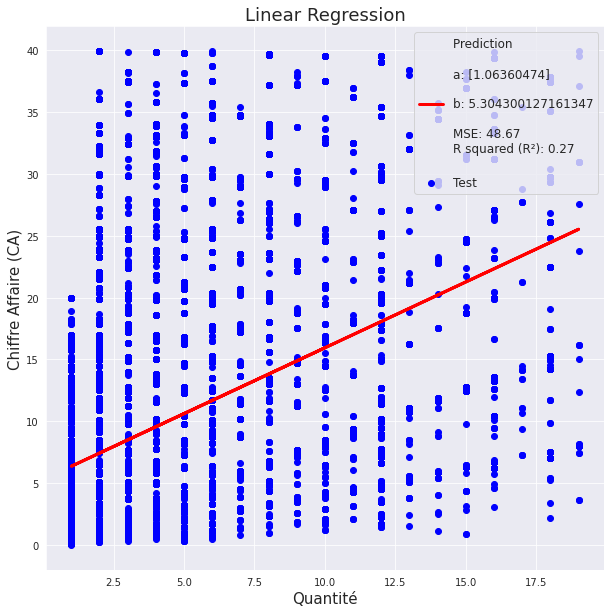

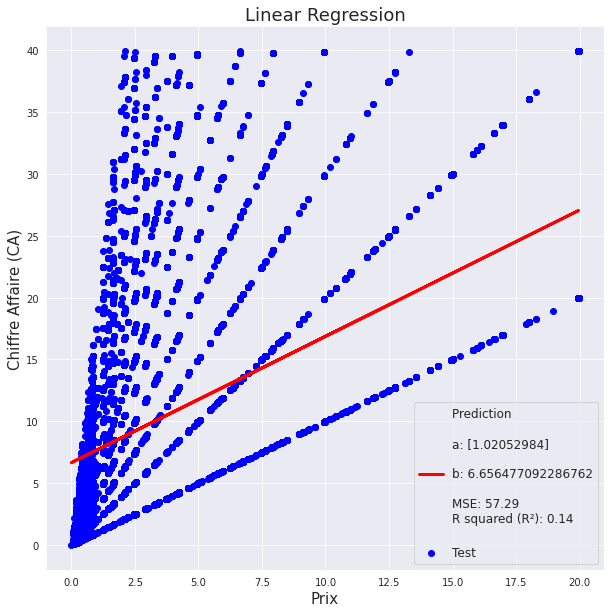

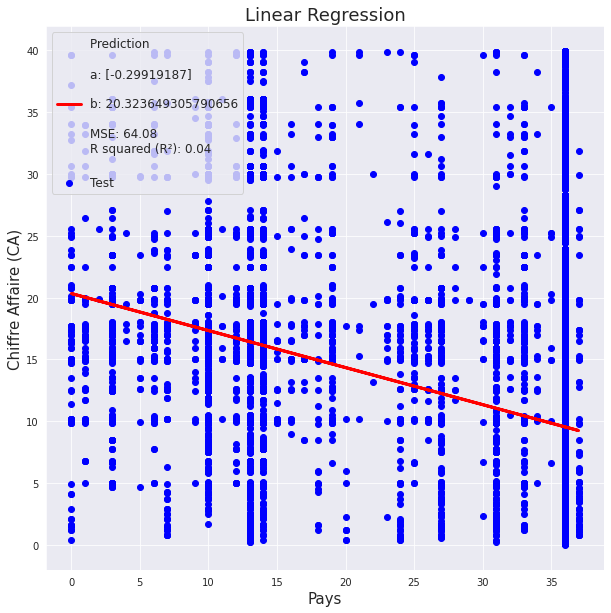

In [ ]:
#@title analyse predictive du Chiffre d'affaire : avec **regression linéaire** 


print(f"Initilisation")
features = ["Quantité","Prix","Pays"]
x = dataframe[features]
target= "Chiffre Affaire (CA)"
y= dataframe[target]

from sklearn.model_selection import train_test_split
print(f"Split")
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=40) #splitting data with test size of 20%
print(f"x_train.shape = {x_train.shape}")
print(f"x_test.shape = {x_test.shape}")
print(f"y_train.shape = {y_train.shape}")
print(f"y_test.shape = {y_test.shape}")

from sklearn.linear_model import LinearRegression

model=LinearRegression()   #construir le model de  linear regression 

#faire l'entrenaiement du model
model.fit(X = x_train, y = y_train)
predicted=model.predict(x_test) #testing our model’s performance

# les coefficients
print("\nCoefficients \n")
print("a: \n", model.coef_)
print("b: \n", model.intercept_)
print(" -------------- \n")

from sklearn.metrics import mean_squared_error, r2_score

for cat in features:
  xtrain = pd.DataFrame(x_train[cat])
  xtest =  pd.DataFrame(x_test[cat])
  model=LinearRegression()   #construir le model de  linear regression 

  #model.fit(xtrain,y_train)  #faire l'entrenaiement du model
  model.fit(X = xtrain, y = y_train)
  predicted=model.predict(xtest) #testing our model’s performance


  text_legend = "\n"
  text_legend += "\n"
  text_legend += f"a: {model.coef_}\n" 
  text_legend += "\n"
  text_legend += f"b: {model.intercept_}\n"
  text_legend += "\n"
  text_legend += "MSE: %.2f " % round(mean_squared_error(y_test,predicted), 2)
  text_legend += "\n"
  text_legend += "R squared (R²): %.2f" % round(r2_score(y_test,predicted), 2)
  text_legend += "\n"

  # graph
  plt.figure(figsize=(10,10))
  plt.scatter(xtest, y_test, color="blue", label ='Test')
  plt.plot(xtest, predicted, color="red", linewidth=3, label =f'Prediction {text_legend}')
  plt.title("Linear Regression", fontsize = 18)
  plt.ylabel(target, fontsize = 15)
  plt.xlabel(xtest.columns[0], fontsize = 15)
  plt.legend(fontsize = 12)
  plt.show()

     


# Deploiement & test Linear regression 

In [ ]:
def prediction_CFA_par_stock_vendu(data):

  features = ["Produit","Quantité","Prix","Pays"]
  x = dataframe[features]
  target= "Chiffre Affaire (CA)"
  y= dataframe[target]

  from sklearn.linear_model import LinearRegression

  LR=LinearRegression()  

  LR.fit(X = x, y = y)
  pickle.dump(LR, open('prediction_CFA_par_stock_vendu.pkl','wb'))

In [ ]:
prediction_CFA_par_stock_vendu(data)

In [ ]:
colone = ["Produit","Quantité","Prix","Pays","Mois","Chiffre Affaire (CA)"]	
dfTest=pd.DataFrame({"Produit": ["Produit 1"],"Quantité":[15],"Prix":[2.5],"Pays":['France'],"Mois":["Decembre"],"Chiffre Affaire (CA)":[37.5]})
dfTest

,Produit,Quantité,Prix,Pays,Mois,Chiffre Affaire (CA)
0,Produit 1,15,2.5,France,Decembre,37.5


In [ ]:
kmeans_modele = pickle.load(open('/content/prediction_CFA_par_stock_vendu.pkl','rb'))
value = kmeans_modele.predict(code(dfTest[["Produit","Quantité","Prix","Pays"]]))
print(f"Chiffre Affaire (CA) réel = {dfTest['Chiffre Affaire (CA)']} , CFA attendu= {value[0]}")

Chiffre Affaire (CA) réel = 0    37.5
Name: Chiffre Affaire (CA), dtype: float64 , CFA attendu= 26.903232419987873


# Conclusion

l'algorithme K-means nous a permi de cibler notre marché en groupe appelé encore cluster

et nous avons pu  prédire le chiffre d'affaire de chaque clientèl grâce à la regression liéaire 